<a href="https://colab.research.google.com/github/ganjiakhil/Time-Series-Analysis/blob/main/Time_Series_Analysis_Practice_on_Beijing_AQ_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install download

In [6]:
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [5]:
from download import download
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind = 'zip') #Beijing Air Quality Dataset

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:00<00:00, 12.3MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [13]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Jun 13 08:07 ..
-rw-r--r-- 1 root root 2835916 Jun 13 08:07 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Jun 13 08:07 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Jun 13 08:07 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Jun 13 08:07 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Jun 13 08:07 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Jun 13 08:07 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Jun 13 08:07 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Jun 13 08:07 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Jun 13 08:07 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Jun 13 08:07 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Jun 13 08:07 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [10]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding = 'ISO-8859-1')

In [25]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [27]:
from datetime import datetime

In [28]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [29]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True )

In [30]:
aq_df

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [38]:
print('Rows     : ',aq_df.shape[0])
print('\nColumns  : ',aq_df.shape[1])
print('\nFeatures : ',aq_df.columns.to_list())
print('\nMissing Values : ',aq_df.isnull().any())
print('\nUnique Values  : ',aq_df.nunique())

Rows     :  35064

Columns  :  19

Features :  ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values :  year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values  :  year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5           

In [35]:
aq_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [39]:
aq_df_non_index = aq_df.copy()

In [40]:
aq_df = aq_df.set_index('year_month_day_hour')

In [44]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [50]:
aq_df.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [51]:
pm_data = aq_df['PM2.5']

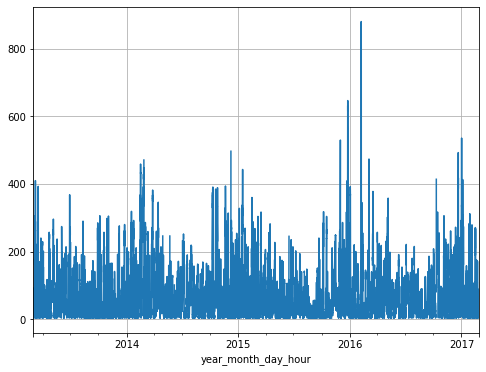

In [54]:
pm_data.plot(grid=True)

In [56]:
pm_data_2015 = aq_df.loc['2015', 'PM2.5']

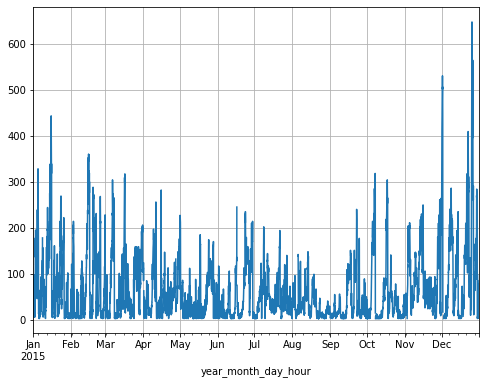

In [58]:
pm_data_2015.plot(grid=True)

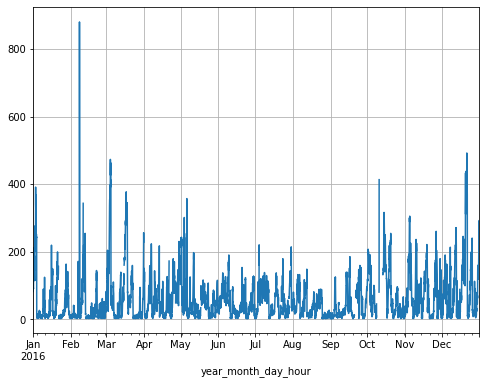

In [59]:
pm_data_2016 = aq_df.loc['2016', 'PM2.5']
pm_data_2016.plot(grid=True)

In [61]:
import plotly.express as px

In [62]:
fig = px.line(aq_df_non_index, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

In [63]:
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [64]:
fig = px.line(aq_df_non_index, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step='year', stepmode='backward'),
                      dict(count=2, label='2y', step='year', stepmode='backward'),
                      dict(count=3, label='3y', step='year', stepmode='backward'),
                      dict(step='all')
        ])
    )
)

Text(0, 0.5, 'PM2.5')

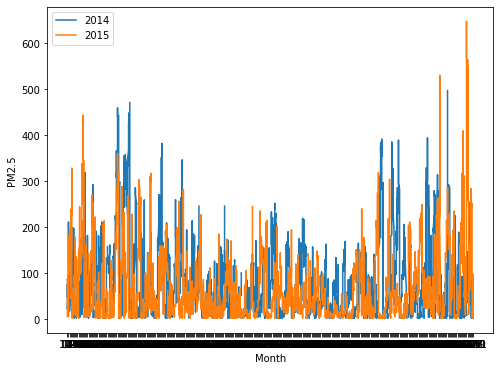

In [75]:
#Overlay plots of two years to compare easily
df_2014 = aq_df['2014'].reset_index()
df_2015 = aq_df['2015'].reset_index()

df_2014['month_day_hour'] = df_2014.apply(lambda x : str(x['month'])+'-'+x['day'], axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x : str(x['month'])+'-'+x['day'], axis=1)

plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')

In [79]:
aq_df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0

In [81]:
aq_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff984064cd0>,
      dtype=object)

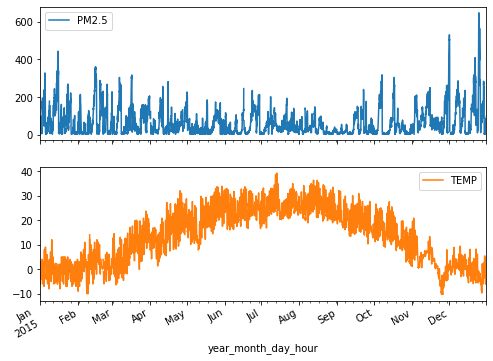

In [82]:
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff984595a90>,
      dtype=object)

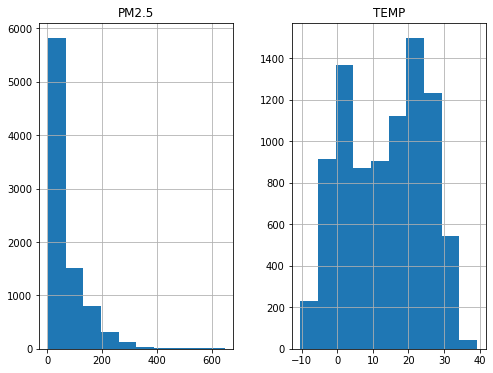

In [83]:
pm_data_2015.hist()

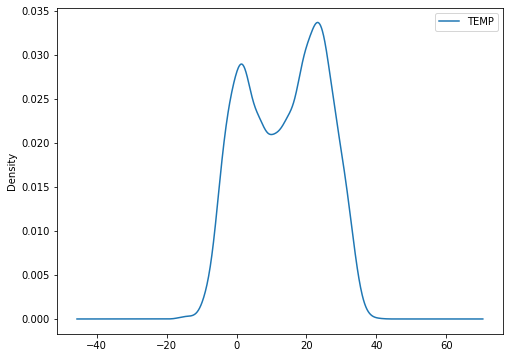

In [85]:
aq_df[['TEMP']].plot(kind='density')

In [86]:
#lag plot - Kind of a scatter plot where x-axis is current type and y-axis is lag

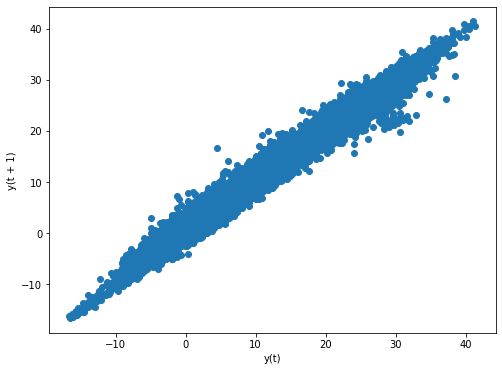

In [87]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=1)

#Why lag plot? (lag plot gives us auto correlation)

1. Gives an idea if the lag data is linear. lag=1 => 1 hour lag data
2. When we are correcting trend or stationary, we may have to use a smoothing function and lag plot helps to understand data better

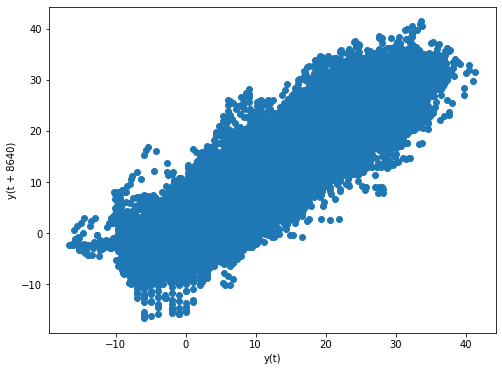

In [97]:
pd.plotting.lag_plot(aq_df[['TEMP']], lag=8640) #positive correlation

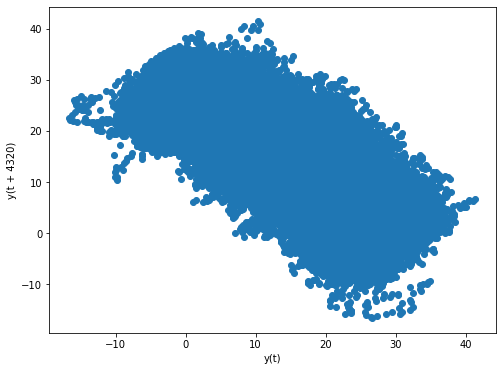

In [98]:
pd.plotting.lag_plot(aq_df[['TEMP']], lag=4320) #negative correlation

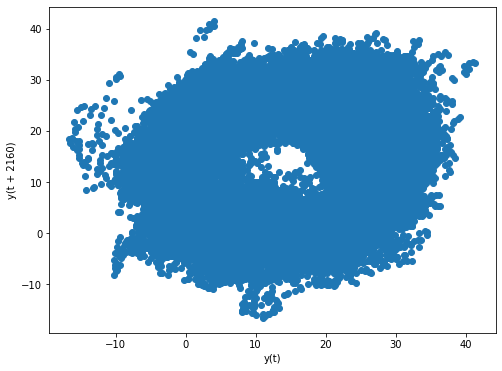

In [99]:
pd.plotting.lag_plot(aq_df[['TEMP']], lag=2160) #NO Correlation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff97ac15590>,
      dtype=object)

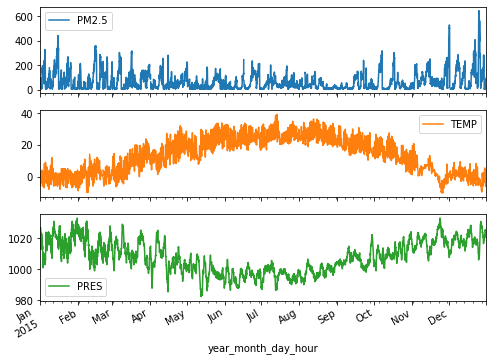

In [102]:
pm_data_2015 = aq_df['2015'][['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True)

In [104]:
print(aq_df.columns.to_list())

['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff97a5d7990>,
      dtype=object)

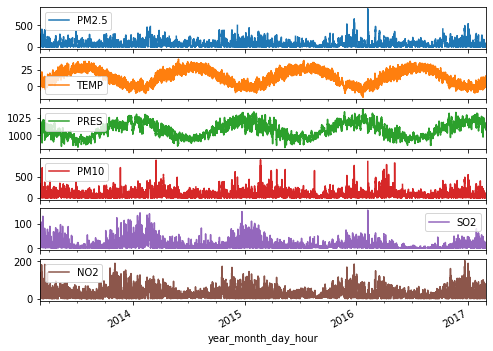

In [107]:
aq_df[['PM2.5', 'TEMP', 'PRES', 'PM10', 'SO2', 'NO2']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff95f836050>,
      dtype=object)

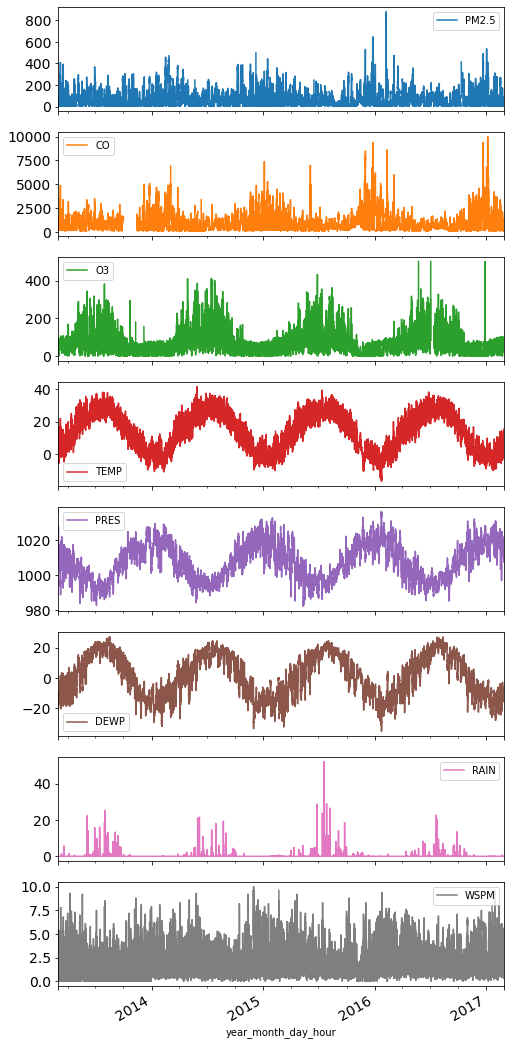

In [119]:
aq_df[['PM2.5', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].plot(figsize=(8, 20), subplots=True, fontsize=14)

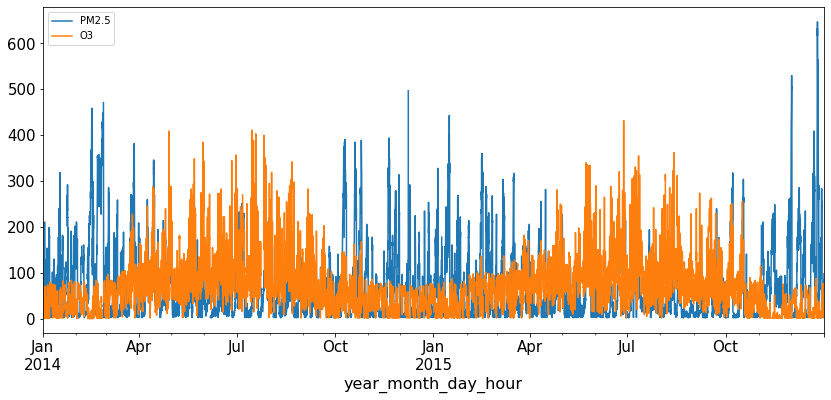

In [127]:
aq_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(14,6), fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=16);

In [131]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

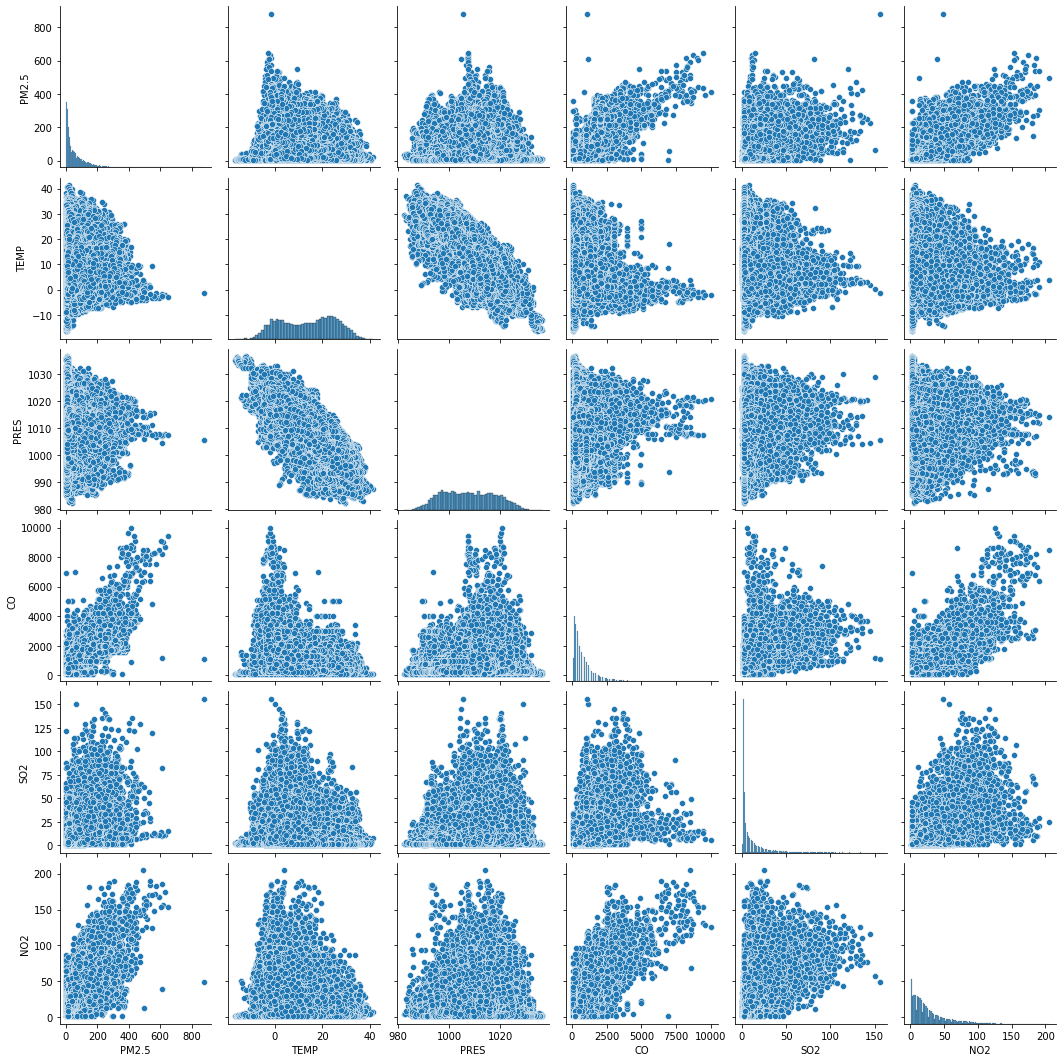

In [134]:
sns.pairplot(aq_df[['PM2.5', 'TEMP', 'PRES', 'CO', 'SO2', 'NO2']]) #Gives regular correlation #Multi-Variate Analysis 

In [137]:
aq_corr = aq_df[['PM2.5', 'TEMP', 'PRES', 'CO', 'SO2', 'NO2']].corr(method='pearson')
aq_corr

,PM2.5,TEMP,PRES,CO,SO2,NO2
PM2.5,1.000000,-0.089939,-0.008005,0.802737,0.475117,0.718170
TEMP,-0.089939,1.000000,-0.837844,-0.282312,-0.312980,-0.316337
PRES,-0.008005,-0.837844,1.000000,0.172220,0.245297,0.200609
CO,0.802737,-0.282312,0.172220,1.000000,0.529182,0.798753
SO2,0.475117,-0.312980,0.245297,0.529182,1.000000,0.610433
NO2,0.718170,-0.316337,0.200609,0.798753,0.610433,1.000000


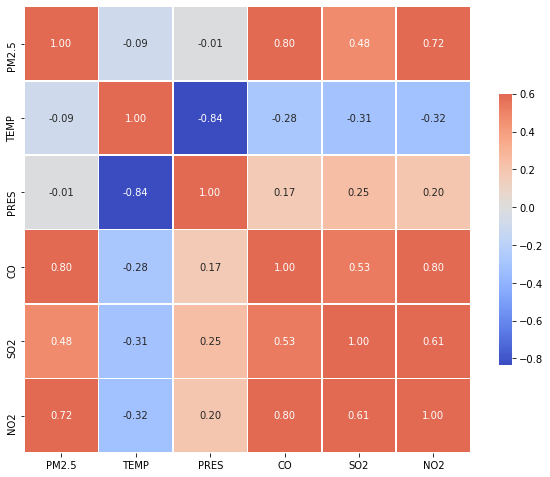

In [149]:
g = sns.heatmap(aq_corr, vmax=0.6, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10, 10)

In [151]:
aq_df.groupby('wd').agg({'PM2.5': ['median', 'mean', 'min', 'max']}).reset_index()

wd  PM2.5                       
        median       mean  min    max
0     E   70.0  88.623363  3.0  434.0
1   ENE   56.5  77.685514  3.0  647.0
2   ESE   78.5  96.492276  3.0  632.0
3     N   29.0  57.546221  3.0  536.0
4    NE   32.0  57.390083  3.0  530.0
5   NNE   26.0  53.946239  3.0  881.0
6   NNW   33.0  62.790775  3.0  548.0
7    NW   21.0  52.769116  3.0  535.0
8     S   52.0  72.497281  3.0  511.0
9    SE   70.0  85.045709  3.0  617.0
10  SSE   61.0  79.925967  3.0  614.0
11  SSW   50.0  73.078253  3.0  493.0
12   SW   46.0  70.233140  3.0  459.0
13    W   22.0  49.488104  3.0  446.0
14  WNW   14.0  37.307447  3.0  515.0
15  WSW   39.0  66.725926  3.0  451.0

In [156]:
aq_df_na = aq_df.dropna()

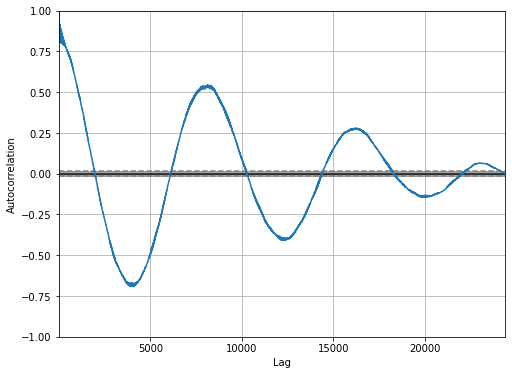

In [157]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP']) #gives autocorrelation with lag

In [158]:
aq_df_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

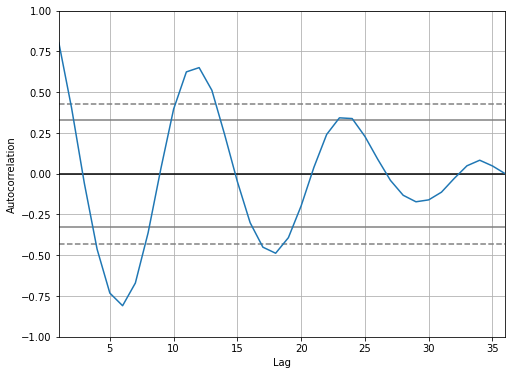

In [159]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

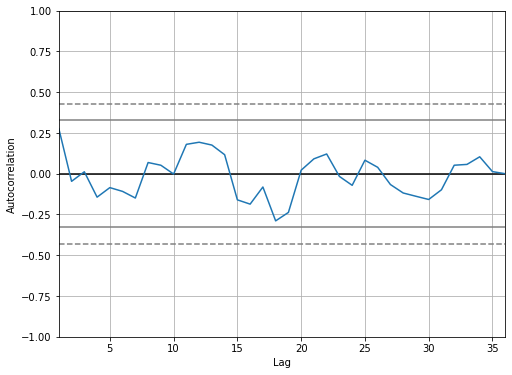

In [160]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('1m').mean())